## Example of usage
### 1. Loading the data

A good begin is to import the object class `BasinData` to instance and store data from a basin sediment sources. A instance of `BasinData` should be created and data load from a file. Is usual store data files in the 'data' directory one level above. The import and the creation of a instance of `BasinData` is showed below.

In [1]:
from basindata import BasinData

In [2]:
arvorezinha = BasinData("../data/arvorezinha_database.xlsx")

Since the file is load, some information and statistics can be visualizated as in the following examples .

In [3]:
arvorezinha.infos()

Sample Sizes,Fe,Mn,Cu,Zn,Ca,K,P
C,9,9,9,9,9,9,9
E,9,9,9,9,9,9,9
L,20,20,20,20,20,20,20
Y,24,24,24,24,24,24,24


In [4]:
arvorezinha.means()

Means,Fe,Mn,Cu,Zn,Ca,K,P
C,6.21,1470.45,18.23,79.71,165.23,3885.12,0.03
E,6.76,811.95,23.28,86.02,76.10,3182.27,0.01
L,6.63,1854.05,20.05,88.28,159.17,6572.31,0.06
Y,6.16,1119.02,30.92,99.66,276.47,9445.76,0.07


In [5]:
arvorezinha.std()

STD,Fe,Mn,Cu,Zn,Ca,K,P
C,0.48,548.49,2.41,7.84,82.19,1598.45,0.01
E,0.98,399.90,1.98,6.96,26.21,948.95,0.01
L,1.07,399.77,3.86,15.70,79.33,2205.99,0.01
Y,1.01,294.13,10.13,8.40,79.37,2419.21,0.02


### 2. Using the clarkeminela module

We can easily reproduce the Clarke and Minella (2016) method of measures the increase in uncertainty when sampling sediment fingerprinting. The full explanation of this method is avaliable in the paper "Evaluating sampling efficiency when estimating sediment source contributions to suspended sediment in rivers by fingerprinting". DOI: 10.1002/hyp.10866. The steps needed to achieve the same results described in paper can be executed by a few functions calls as will be shown below

First we need to import the `clarckeminella` analysis module. We will call it `cm`. 

In [6]:
import clarkeminella as cm

Now we will calculate and save in a file all the combinations possible for proportions contribuited by the sediment sources. The rotine `calculate_and_save_all_proportions()` will create two files, one for all cobinations possible for eath sample in data base, savis its indexes, and the corresponding proportions. The defoult method for calculate is the ordinary least square. Other methods can be choosed by `bd.set_solver_option(option)`. 

In [7]:
arvorezinha.calculate_and_save_all_proportions(load=False)

Calculating all proportions...
Done! Time processing: 2.6964030265808105
Total combinations: 38880 , shape of proportions: (38880, 3)
Folder to save output files is: '../output'.
Saving combinations indexes in: C9E9L20Y24_combs.txt
Saving proportions calculated in: C9E9L20Y24_props.txt
Time for save files: 0.1439964771270752


If you want to store the proportions solutions and the combination indexes, you can choose `load=True`(is the defoult option) when call the rotine above. The proportions solutions and the combination indexes wil be  stored on `BasinData`object class.

For read the files created and load proportions solutions and the combination indexes we can use the `load_combs_and_props_from_files(combs_file, props_file)` function. A example is showed below.

In [8]:
combs, Ps = arvorezinha.load_combs_and_props_from_files('../output/C9E9L20Y24_combs.txt',
                                                        '../output/C9E9L20Y24_props.txt')

We can verify de array data loaded making.

In [9]:
display(combs, Ps)

array([[ 0,  0,  0,  0],
       [ 0,  0,  0,  1],
       [ 0,  0,  0,  2],
       ...,
       [ 8,  8, 19, 21],
       [ 8,  8, 19, 22],
       [ 8,  8, 19, 23]])

array([[ 0.445 , -0.2977,  0.8526],
       [ 0.3761,  0.128 ,  0.4959],
       [ 0.3454,  0.1248,  0.5298],
       ...,
       [ 0.4963, -0.0081,  0.5118],
       [ 0.4212, -0.6676,  1.2464],
       [-0.0679, -0.138 ,  1.206 ]])

The Clarke and Minella's criterion for considering a feasible solution is that the proportion contributed by each source $P_i$ is such that $0<P_i<1$. We can extract the feaseble solutions usin a function `cm_feasebles` of `clarckeminella` analysis module. This is showed below.

In [10]:
Pfea = cm.cm_feasebles(Ps)
print("The total number of feasible solution is:", len(Pfea))

The total number of feasible solution is: 8132


A confidence region can be calculated in 2 dimentions using the $95 \%$ points closest to the feaseble proportions average usin distances given by $(P_i-P^*)^T S^{-1}(P_i-P^*)$, where $S$ is the $2 \times 2$ variance-covariance matrix of the feasible solutions and 
$P^*$ is the mean of feaseble proportions.

A more detailed explanation can be can be obtained in the Clarke and Minella's paper.

The `clarckeminella` module  implement a function for get a confidence region, as can be seen in the example below.

In [11]:
Pcr = cm.confidence_region(Pfea)
print("The total number of points in 95% confidence region is:", len(Pfea))

The total number of points in 95% confidence region is: 8132


Lets draw the confidence region usin the `draw_hull(pts)` function.

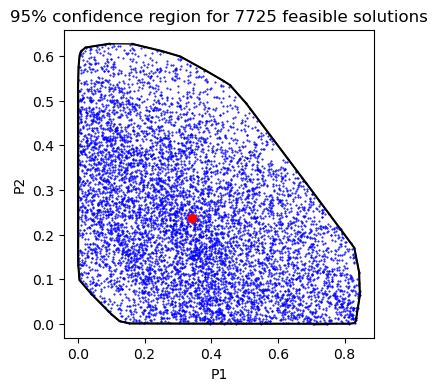

In [12]:
cm.draw_hull(Pcr)

In [13]:
arvorezinha.props

array([[ 0.445 , -0.2977,  0.8526],
       [ 0.3761,  0.128 ,  0.4959],
       [ 0.3454,  0.1248,  0.5298],
       ...,
       [ 0.4963, -0.0081,  0.5118],
       [ 0.4212, -0.6676,  1.2464],
       [-0.0679, -0.138 ,  1.206 ]])

In [14]:
arvorezinha.combs

array([[ 0,  0,  0,  0],
       [ 0,  0,  0,  1],
       [ 0,  0,  0,  2],
       ...,
       [ 8,  8, 19, 21],
       [ 8,  8, 19, 22],
       [ 8,  8, 19, 23]])

### 3. Processing data from reductions and repetitions 

As a result of Clarke and Minella's article presents 
table and graphs of average values ​​for 50 repetitions taking
subsamples of different sizes drawn from each sample set.
A 95% confidence regions are calculated for each sample reduction and the proportions $P_1$ and $P_2$,
along with the standard deviations is calculated.

De full analysis can be repreduced and customized usin the routine `run_repetitions_and_reduction (basindata, source_key, list_of_reductions,repetitions=50)`. The results is saved in a `csv`file an can be stored and load later. A example is showed below.

In [15]:
tableY = cm.run_repetitions_and_reduction (arvorezinha, 'Y',[2,4,8,12,16,20,24])

,nSamp,CV,Mean,Std,Total,Feas,MeanP1,MeanP2,MeanP3
0,2,11.1479,0.3609,0.0402,3240,379,0.298920,0.212890,0.488192
1,4,5.7230,0.3879,0.0222,6480,746,0.326359,0.216039,0.457600
2,8,4.3644,0.3949,0.0172,12960,3413,0.354423,0.225666,0.419910
3,12,2.6970,0.3989,0.0108,19440,3358,0.332960,0.253789,0.413251
4,16,1.5792,0.3992,0.0063,25920,5829,0.356475,0.247702,0.395823
5,20,1.0663,0.4022,0.0043,32400,6489,0.339197,0.255122,0.405680
6,24,0.0000,0.4024,0.0000,38880,8132,0.339917,0.245394,0.414688


Saving in C9E9L20Y24_Y-2-4-8-12-16-20-24.csv


In [ ]:
tableL = cm.run_repetitions_and_reduction (arvorezinha, 'L',[2,4,8,12,16,20,])

Processing for 12 subsamples of L , repetition number 46


Finally the results can be ploted by columns setting the files and the names of columns to be ploted, like the example below.


In [ ]:
import plots
files = ['../output/C9E9L20Y24_Y-2-4-8-12-16-20-24.csv',
         '../output/C9E9L20Y24_L-2-4-8-12-16-20.csv']

plots.plot_cm_outputs(files, 'nSamp', 'CV')